# Project : Investigate a Dataset (Database_No_show_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
    <li><a href="#ref">Reference</a></li>
</ul>

<a id ='intro' a></a>
## Introduction: 
The dataset used for this project was gotten through a link from Udacity's classroom. The dataset contains informations about a patient, if they showed up or not, if they are diabetic or handicap and some other features. 110527 observations are contained in this dataset with a total of 14 columns.

some questions i would love to answer are:
1. Neighbourhood with most situated hospital
2. What gender had the most appointment
3. Did patients show up or not
4. Does sending of messages affect patients appointment?
5. Could there be patients with more than one appointment? 

## Dataset Description

| Column_Name | Value | Description |
| --- | --- | --- |
| PatienID | number | Identification of a patient |
|AppointmentID|number|Identification of each appointment|
|Gender|F or M|       it says 'F' if female or 'M' if man|
|ScheduledDay|date|tells us on what day the patient set up their appointment|
|AppointmentDay|date|	the day of the actuall appointment, when they have to visit the doctor|
|Age|number|how old is the patient|
|Neighbourhood|string|indicates the location of the hospital|
|Scholarship|0 or 1|indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família|
|Hipertension|0 or 1|indicates if the patient has hipertension|
|Diabetes|0 or 1|indicates if the patient has diabetes|
|Alcoholism|0 or 1|indicates if the patient is an alcoholic|
|Handcap|0 or 1|indicates if the patient is handicaped|
|SMS_received|0 or 1|1 or more messages sent to the patient|
|No-show|Yes or No|it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### observations:
- Patient id is float instead of int
- There are total 14 columns, 13 of them are independent and 1 dependent (No-show)
- There are no missing values in the dataset
- ScheduledDay and AppointmentDay column datatype should be in date format instead of object

In [5]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### Observations:
- The smallest age of patient appears to  be -1 but its not possible for one to have a negative age
- 75% of patients are below 55yrs
- We have 81 unique cases for Neighbourhood column

<a id='wrangling'></a>
## Data Wrangling

In [6]:
df_copy = df.copy()

##### Age

In [7]:
# lets see all patients with negative age 

neg_age = df.query('Age < 0')
neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There's only one observation for this search, so we can remove this row from our dataset

In [8]:
# checking for instances where patients are 0yrs old
df.query('Age == 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


We can see we have 3539 observation for this search but we wont be dropping these rows because there's a possiility that patients with age zero(0) are new born babies or babies that are less than a year old.

In [9]:
# Removing row with negative age value

df = df[df['Age'] >=0]

In [10]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We ca see that the change has been implemented and our minimu age here is zeo(0)

##### Patient ID

In [11]:
# checking numbers of patients with ID as type float
float_patientID = df[~ df['PatientId'].apply(lambda x: x.is_integer())]

float_patientID

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


They are only 5 patients whoses ID's were recorded as float, so lets correct this

In [12]:
# lets first convert patient ID column to string so we can extraxt decimal point (.) from the column
df['PatientId'] = df['PatientId'].astype(str)

In [13]:
# Now lets remove the decimal point
df['PatientId'] = df['PatientId'].str.replace('.','')

In [14]:
# Now lets convert our column to integer
df['PatientId'] = df['PatientId'].astype('int64')

##### ScheduledDay and AppointmentID

In [15]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Ref : https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

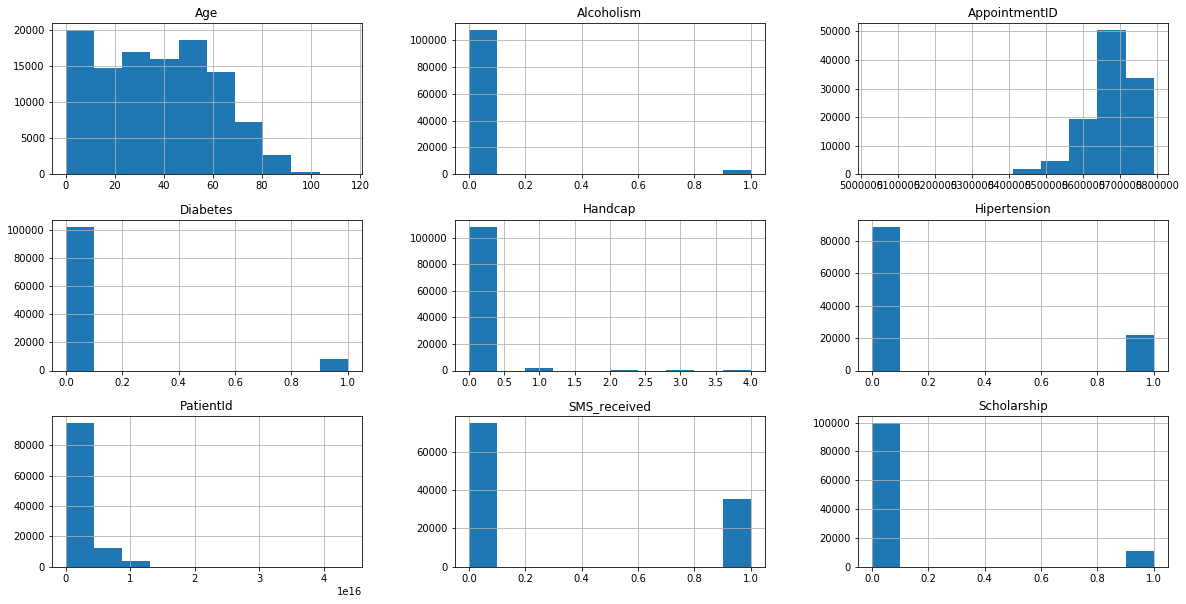

In [17]:

df.hist(figsize=(20,10));

### Observation:
- **age**: Majority of the patients are young people and as the age of patients goes beyound 60, there is a decrease in number of patients.
- **Alcoholism**: Most of the patients are not alcoholic
- **Diabetes**: Also, Majority of the patient do not suffer from diabetes

In [20]:
# function to plot bar chat
def bar_plot(data_frame, column, x_label, y_label, title):
    data_frame[column].value_counts().plot(kind='bar');
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### 1. Neighbourhood with most situated hospital

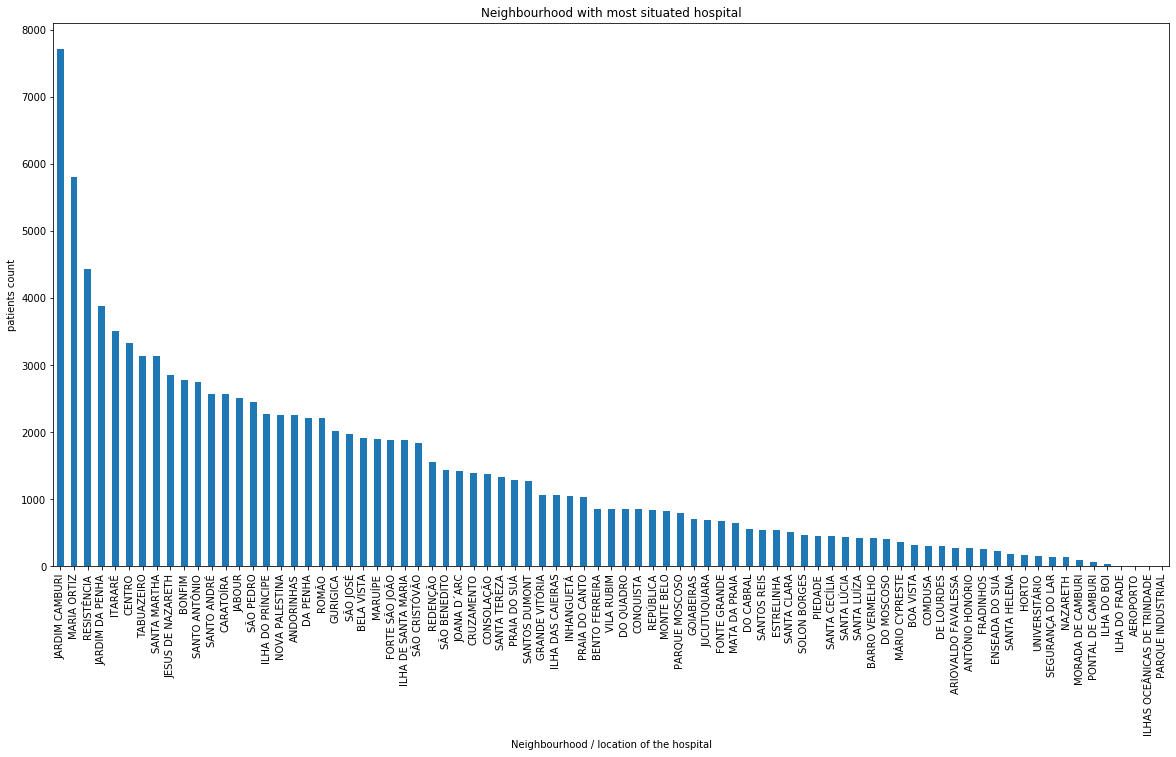

In [19]:
# lets take a look neighborhood to see where most hospital was situated

plt.figure(figsize=(20,10))
bar_plot(df, 'Neighbourhood', 'Neighbourhood / location of the hospital', 'patients count', 
         'Neighbourhood with most situated hospital')

### 2. What gender had the most appointment?

Total number of female patient = 71839
Total number of male patient = 38687
percentage of female in the dataset = 64%


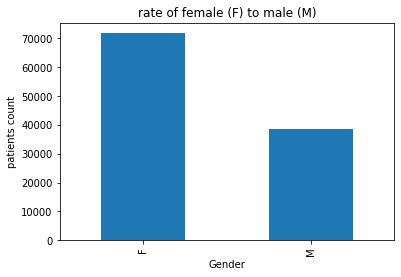

In [21]:

bar_plot(df, 'Gender', 'Gender', 'patients count', 'rate of female (F) to male (M)')

total_females = len(df[df['Gender'] == 'F'])
total_male = len(df[df['Gender'] == 'M'])

#total number of male and female in the data set
print(f'Total number of female patient = {total_females}')
print(f'Total number of male patient = {total_male}')

# percentage of female in the dataset
print(f'percentage of female in the dataset = {int(total_females/len(df)*100)}%')

There are more female than male who had appointment

### 3. Did patients show up or not?

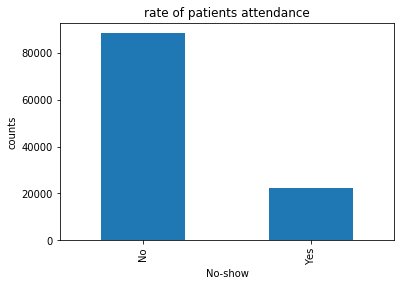

In [22]:
bar_plot(df,'No-show', 'No-show', 'counts', 'rate of patients attendance' )

As we can see, majority of patients actually showed up for their appointment.

### 4. Does sending of messages affect patients appointment?

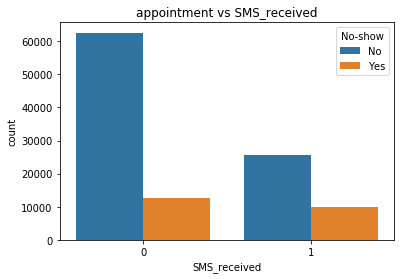

In [23]:
sns.countplot(x='SMS_received', hue='No-show', data=df).set(title='appointment vs SMS_received');

Suprisingly, most of the patients who showed up did not actually receive any SMS.

### 5. Could there be patients with more than one appointment?

Text(0, 0.5, 'counts')

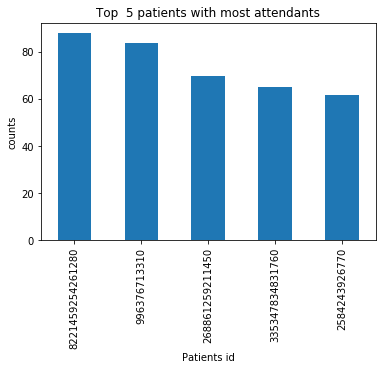

In [24]:
df['PatientId'].value_counts()[0:5].plot(kind='bar');
plt.title('Top  5 patients with most attendants')
plt.xlabel('Patients id')
plt.ylabel('counts')

we can clearly see that they are patients with multiple appointments and with such numbers of scheduled appointment, it is possible for a patient to skip some session, may be distace of hospital from home or just taking a break from the series of appointment.

### 6. Does the gender of the patient affect the show up rate and what percent of both male and female missed their appointment?

out of 38687 appointments made by male, 7725 were missed with a percentage of 20%
out of 71839 appointments made by male, 14594 were missed with a percentage of 20%


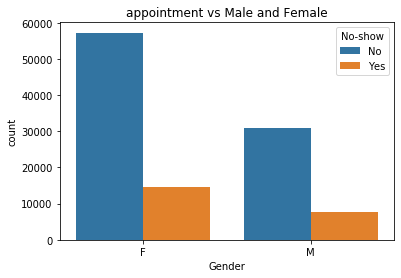

In [25]:
sns.countplot(x='Gender', hue='No-show', data=df).set(title='appointment vs Male and Female');

all_male = df.query('Gender == "M"')
all_female = df.query('Gender == "F"')

missed_by_male = len(all_male[all_male['No-show'] == 'Yes'])
missed_by_female = len(all_female[all_female['No-show'] == 'Yes'])

print(f'out of {len(all_male)} appointments made by male, {missed_by_male} were missed with a percentage of {int(round(missed_by_male/len(all_male)*100))}%')
print(f'out of {len(all_female)} appointments made by male, {missed_by_female} were missed with a percentage of {int(round(missed_by_female/len(all_female)*100))}%')

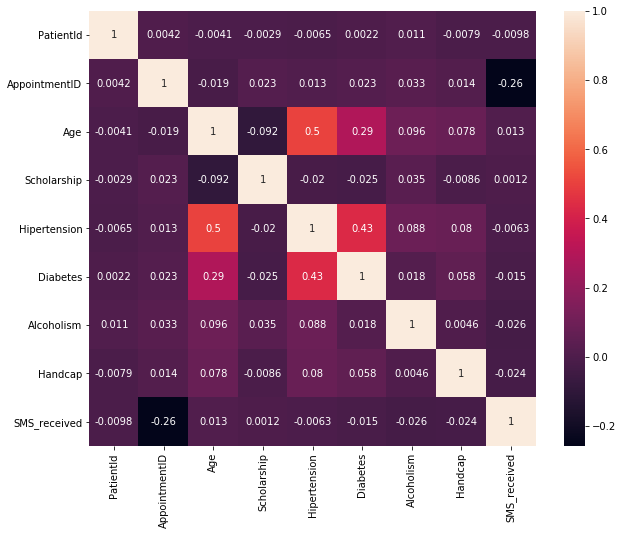

In [29]:
plt.figure(figsize=(10,))
sns.heatmap(df.corr(), annot=True)

<a id='conclusion'a></a>
## Conclusion:
        From our analysis, we can see that:
        1. Alot of very young people are featured on this dataset with majority of them at age zero(0).
        2. 25% of patients are below 18yrs, on average a patient age is 37yrs and majority of patient are below 55yrs.
        3. Most of the patients are not Alcoholic, Diabetic and also, most of them do not have Hypertension.
        4. 20% of appointments were missed by patients.
        5. in regards to sms sent, most of the patient who showed up for their appointment didnt receive any sms.
        6. Majority of patients are not enrolled in Brasilian welfare program Bolsa Família
        7. The dataset is made up of 64% female.
        
        Limitations:
        
        1. The total number of patients who showed up for appointment is 88207 which is which makes up 80% of data. 
        This shows already that we have an imbalanced dataset and when we decide to build a machine learning model with it,
        our model will learn more from the dominat class which will may lead to inaccurate predictions from our model.
        
        2. Majority of patients who missed an appointment actually received SMS from the hospital but we cannot say when 
        those messages was sent. We do not know if those messages were sent days, weeks or months before the day of 
        appointment. As this could play a role as to why patients do not show up.
        
        3. Considering the fact that only about 20% of patients in most categories missed an appointment, there seems to 
        be no strong correlation for a change in one column to lead to change in another.

<a id='ref' a></a>
## Reference:
- https://www.kaggle.com/code/charmipatel/investigating-dataset-to-find-noshow-pattern/notebook
- https://github.com/ksatola/Medical-Appointments-No-Shows/blob/master/no-shows-ks4-final.ipynb
- https://www.kaggle.com/datasets/joniarroba/noshowappointments